In [1]:
from kaulos import *

M = 1
T = 100
x_train = np.abs(np.random.randn(1,T,M)) * 0.1

model = Sequential()
model.add(LeakyIAF(1.0, 1.0, input_shape = x_train.shape[2:]))

optimizer = Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i,:], x_train[0,i,:])
    As.append(model.predict(x_train[0,i,:]))
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


(1L,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
leaky_iaf_1 (LeakyIAF)       (None, 1L)                1         
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
11.125


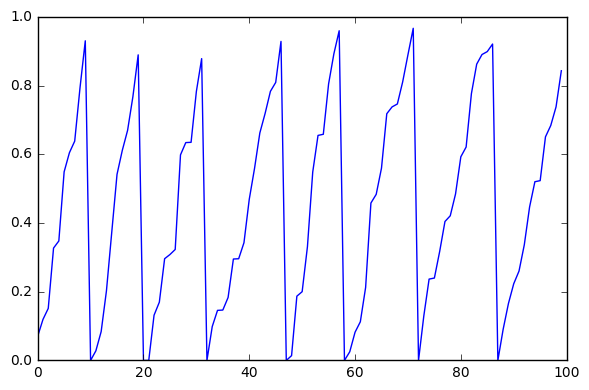

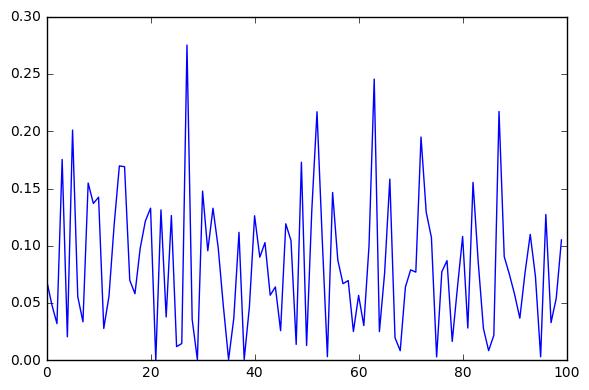

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.array(As)[:,0,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()

In [1]:
from kaulos import *

M = 1
T = 50000
x_train = np.abs(np.random.randn(1,T,M)) * 0. + 2.0

N = M
b = np.eye(N).reshape((N,N))

model = Sequential()
#model.add(LeakyIAF(1.0, 1.0, input_shape = x_train.shape[2:]))
model.add(HodgkinHuxley(1e-4, 1.0, 1.0, input_shape = x_train.shape[2:]))

optimizer = Adam()
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()


import time
start = time.time()
As = []
for i in range(x_train.shape[1]):
    model.train_on_batch(x_train[0,i,:], x_train[0,i,:])
    As.append(model.predict(x_train[0,i,:]))
end = time.time()
print(end - start)

Using Theano backend.
Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


(1L,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hodgkin_huxley_1 (HodgkinHux (None, 1L)                4         
Total params: 4
Trainable params: 0
Non-trainable params: 4
_________________________________________________________________
36.8239998817


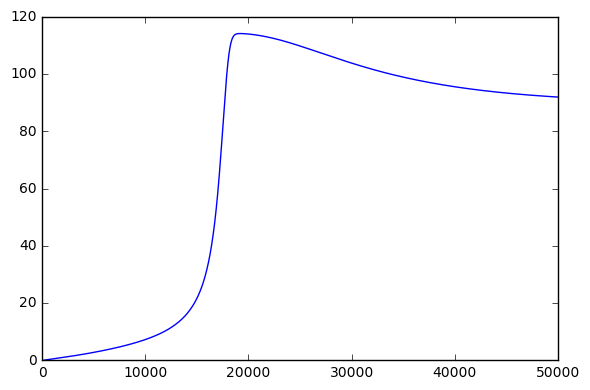

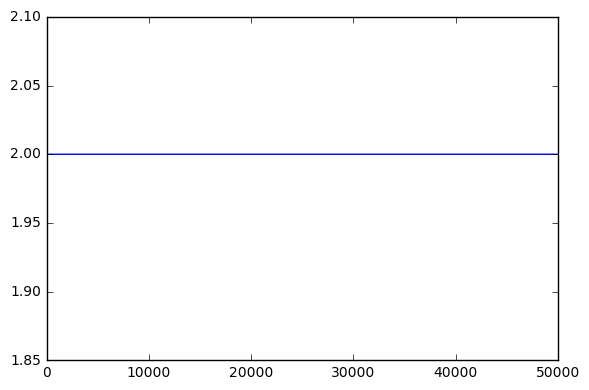

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.array(As)[:,0,0])
plt.tight_layout()

plt.figure()
plt.plot(x_train[0,:,0])
plt.tight_layout()